# Multi-layer Neural Networks

This tutorial builds upon the previous Logistic Regression tutorials. The main difference is that we use more layers, therefore the classifier is no longer a Logistic Regression classifier, it becomes a  multi-layer Neural Network. Between each layer, we insert a non-linear operator, usually a [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) (Rectifier Linear Unit) and this allows the Network to generate non-linear decision rules.

The goals of this tutorial are:
  - Introdcue you to multi-layer Neural Networks and how to define them on     Keras.
  - Show that they can generate non-linear decision rules.
      
## Importing Python Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

import keras
from keras.utils import np_utils 
from keras.models import Model
from keras.layers import Dense, Activation,Input 
from keras.optimizers import SGD

import sys
## Adding dataset_utils to the system path so we can import it
MY_UTILS_PATH = '../Modules/'
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import dataset_utils 

/home/roberto/Documents/virtualenv/venv03/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Loading and Displaying 2D Dataset

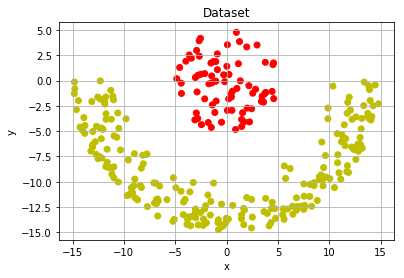

In [2]:
#Generating a synthetic dataset with four classes
nsamples = 300
#data = dataset_utils.spirals(N = nsamples, degrees = 570, start = 90, noise = 0.2) #non-linear dataset
data = dataset_utils.crescent_full_moon(N = nsamples,r1 = 5,r2 = 10,r3 = 15) #non-linear dataset

# Separating features (X) and labels (Y)
X = data[:,:-1] # Features
Y = data[:,-1].astype(int) # Labels

#Number of classes
k = np.unique(Y).size

colors = np.array(['r','y','b','g'])
#Displaying the dataset
plt.scatter(X[:,0],X[:,1],c=colors[Y])

plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.title("Dataset")
plt.show()

## Data Normalization

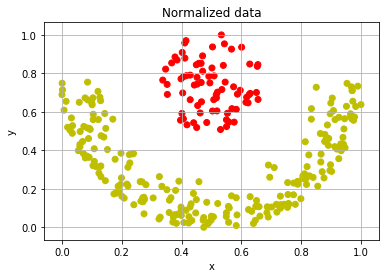

In [3]:
# Range Normalization - normalizing between 0 and 1
X_c = X - X.min(axis=0,keepdims=True)
X_c /= X_c.max(axis=0,keepdims=True)

plt.scatter(X_c[:, 0], X_c[:, 1], c=colors[Y])
plt.title("Normalized data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

## Representing Labels using one-hot-ecoding

In [4]:
Y_oh = np_utils.to_categorical(Y, k) 

# Displaying the 5 first elemnts
print('Y[:5]:')
print(Y[:5])
print('\nY_oh[:5]=')
print(Y_oh[:5])

Y[:5]:
[0 0 0 0 0]

Y_oh[:5]=
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


## Defining the Multi-layer Neural Network with Keras

In [5]:
def my_model(k,learning_rate = 0.15):
    inputs = Input(shape=(2,))
    out1 = Dense(20, activation='relu')(inputs)
    out2 = Dense(15, activation='relu')(out1)
    out3 = Dense(10, activation='relu')(out2)
    out4 = Dense(k, activation='softmax')(out3)
    
    model = Model(inputs=inputs, outputs=out4)
    sgd = SGD(lr=learning_rate)
    model.compile(optimizer=sgd, loss='categorical_crossentropy') 
    return model

## Training the Model

In [6]:
lr = 0.05
model = my_model(k,lr)
batch_size = nsamples
nb_epoch = 10000
n = X.shape[0] # number of training examples
history = model.fit(X_c, Y_oh, batch_size=batch_size, epochs=nb_epoch,verbose=0)

## Prininting Loss and estimated weights (Ws)

Final loss: 0.0001891376933009306
Bias:
[-0.03003885  0.02272231  0.10877235 -0.07819745  0.11299093  0.04623033
  0.          0.          0.29977068  0.28213066 -0.04000475  0.18421868
  0.06791485 -0.47822119  0.05680073 -0.01131637  0.         -0.3126596
  0.79587257  0.        ]
W:
[[ 0.11062286 -0.03278725 -0.29234685  0.14068673  0.01592072  0.02475513
  -0.42745898 -0.28239641 -0.48897335  0.55785101  0.11120678 -0.2922443
   0.78732936  1.56923359 -0.31517174  0.66560338 -0.21191144  1.25358305
  -1.59996823 -0.31711321]
 [-0.52177105  0.62521537  0.32435006  0.60473416  0.39947504  0.58163131
  -0.16121117 -0.10880324 -0.07053868  0.20621605 -0.45942357 -0.04800466
   0.63807674 -0.50821505  0.55607754 -0.50112217 -0.41462075 -0.45740929
   0.14157558 -0.16989802]]


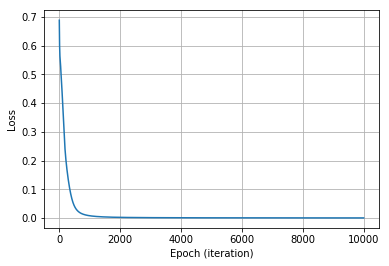

In [7]:
loss = model.evaluate(X_c, Y_oh, verbose=0)
print 'Final loss:',loss

W = model.get_weights()
print 'Bias:\n', W[1]
print 'W:\n', W[0]

plt.plot(history.history['loss'])
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.grid()
plt.show()

## Training Accuracy

In [8]:
Y_hat = model.predict(X_c).argmax(axis = 1)
accuracy = np.sum(Y_hat == Y)/np.float(n)
print
print 'Accuracy: ', accuracy


Accuracy:  1.0


## Logistic Regression Decision Boundary

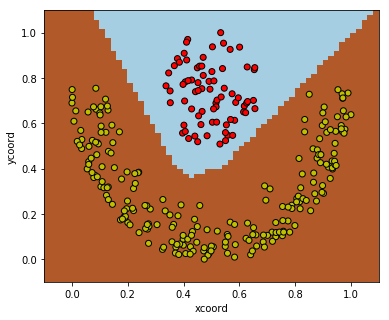

In [9]:
h = .02  # step size in the mesh
slack = 0.1
# Calcula a grade para o espaço de atributos

x_min, x_max = X_c.min(axis=0) - slack, X_c.max(axis=0) + slack
xx, yy = np.meshgrid(np.arange(x_min[0], x_max[0], h), np.arange(x_min[1], x_max[1], h))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Prediction of all samples in our grid
Z = model.predict(X_grid).argmax(axis = 1)
Z = Z.reshape(xx.shape)

# Display decision boundary
plt.figure(1, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Display training samples
plt.scatter(X_c[:,0], X_c[:,1], c=colors[Y], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('xcoord')
plt.ylabel('ycoord')
plt.show()